In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [5]:
am=pd.read_csv("/content/automobile.csv")
am.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
am.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

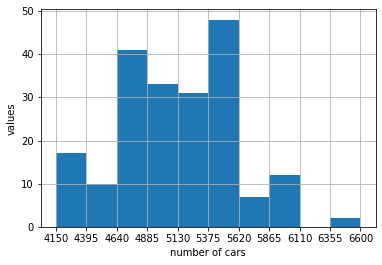

In [11]:
count,bin_edges=np.histogram(am["peak-rpm"])
am["peak-rpm"].plot(kind="hist",xticks=bin_edges)
plt.xlabel("number of cars")
plt.ylabel("values")
plt.grid()
plt.show()

In [14]:
autotemp=am[["num-of-doors","body-style","price"]]
autogroup=autotemp.groupby(["num-of-doors","body-style"],as_index=False).mean()
autogroup


,num-of-doors,body-style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


In [17]:
auto=autogroup.pivot(index="body-style",columns="num-of-doors")
auto

price              
num-of-doors        four           two
body-style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN

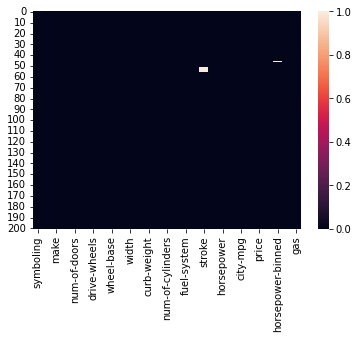

In [21]:
sns.heatmap(am.isnull())

In [18]:
am.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [23]:
a=am["stroke"].mean()
a

3.256903553299492

In [34]:
am["stroke"].fillna(a,inplace=True)

In [29]:
am["horsepower-binned"].unique()

array(['Medium', 'Low', 'High', nan], dtype=object)

In [27]:
o=am["horsepower-binned"].value_counts()
o

Low       115
Medium     62
High       23
Name: horsepower-binned, dtype: int64

In [35]:
am["horsepower-binned"].fillna("Low",inplace=True)

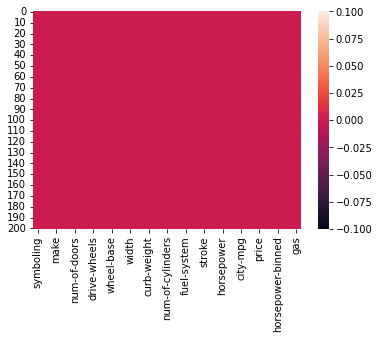

In [37]:
sns.heatmap(am.isnull())

In [38]:
am.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

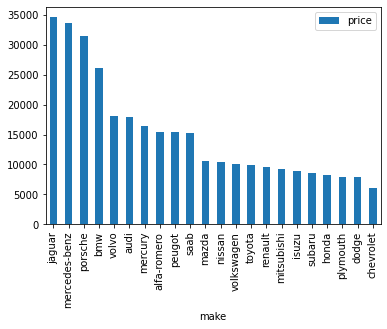

In [70]:
autotemp1=am[["make","price"]]
group1=autotemp1.groupby(["make"]).mean().sort_values(ascending=False,by="price")
group1.plot.bar()


In [67]:
div=am[["make","price"]].groupby(["make"])
div.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
190,volvo,12940.0
191,volvo,13415.0
192,volvo,15985.0
193,volvo,16515.0


In [68]:
stats.f_oneway(div.get_group("audi")["price"],div.get_group("volvo")["price"])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

In [75]:
dat=am[["drive-wheels","horsepower"]].groupby(["drive-wheels"])
dat.head()

,drive-wheels,horsepower
0,rwd,111.0
1,rwd,111.0
2,rwd,154.0
3,fwd,102.0
4,4wd,115.0
5,fwd,110.0
6,fwd,110.0
7,fwd,110.0
8,fwd,140.0
9,rwd,101.0


drive-wheels
4wd    AxesSubplot(0.125,0.125;0.775x0.755)
fwd    AxesSubplot(0.125,0.125;0.775x0.755)
rwd    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

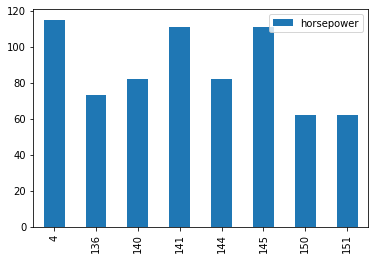

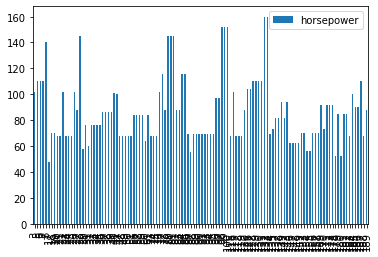

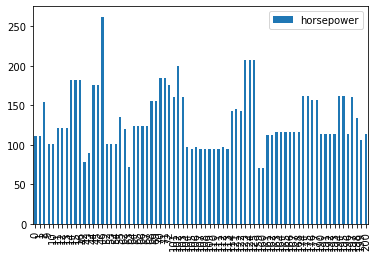

In [95]:
a=am[["drive-wheels","horsepower"]]
g=a.groupby(["drive-wheels"])#.mean().sort_values(ascending=False,by="horsepower")
g.plot.bar()

In [96]:
stats.f_oneway(g.get_group('rwd')["horsepower"],g.get_group("4wd")["horsepower"])

F_onewayResult(statistic=10.481343852641563, pvalue=0.0017484232929474432)